### PROBLEM STATEMENT: We will construct a linear model that explains the relationship a car's mileage (mpg) has with its other attributes

## Import Libraries

### Step 1:Import the libraries

In [14]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
  

In [15]:
### Step 2:Load the file

## Load and review data

In [16]:
car_df = pd.read_csv("auto-mpg.csv")  


In [17]:
car_df.shape

(398, 9)

In [18]:
car_df.sample(10)

mpg  cylinders  displacement horsepower  weight  acceleration  \
80   22.0          4         122.0         86    2395          16.0   
97   18.0          6         225.0        105    3121          16.5   
96   13.0          8         360.0        175    3821          11.0   
4    17.0          8         302.0        140    3449          10.5   
185  26.0          4          98.0         79    2255          17.7   
203  29.5          4          97.0         71    1825          12.2   
51   30.0          4          79.0         70    2074          19.5   
18   27.0          4          97.0         88    2130          14.5   
167  29.0          4          97.0         75    2171          16.0   
377  31.0          4          91.0         68    1970          17.6   

     model year  origin                 car name  
80           72       1          ford pinto (sw)  
97           73       1         plymouth valiant  
96           73       1  amc ambassador brougham  
4            70       1              ford torino  
185          76       1               dodge colt  
203          76       2        volkswagen rabbit  
51           71       2              peugeot 304  
18           70       3             datsun pl510  
167          75       3           toyota corolla  
377          82       3         mazda glc custom

In [19]:
#dropping/ignoring car_name 
car_df = car_df.drop('car name', axis=1)
car_df.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1

In [20]:
# Also replacing the categorical var with actual values
car_df['origin'] = car_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
car_df.sample(10)

mpg  cylinders  displacement horsepower  weight  acceleration  \
389  22.0          6         232.0        112    2835          14.7   
324  40.8          4          85.0         65    2110          19.2   
39   14.0          8         400.0        175    4464          11.5   
65   14.0          8         351.0        153    4129          13.0   
109  21.0          4         140.0         72    2401          19.5   
276  21.6          4         121.0        115    2795          15.7   
135  18.0          6         225.0        105    3613          16.5   
288  18.2          8         318.0        135    3830          15.2   
159  14.0          8         351.0        148    4657          13.5   
290  15.5          8         351.0        142    4054          14.3   

     model year   origin  
389          82  america  
324          80     asia  
39           71  america  
65           72  america  
109          73  america  
276          78   europe  
135          74  america  
288          79  america  
159          75  america  
290          79  america

In [21]:
### One hot encoding
car_df = pd.get_dummies(car_df, columns=['origin']) ### one hot encoding
car_df.sample(10)

mpg  cylinders  displacement horsepower  weight  acceleration  \
227  19.0          6         225.0        100    3630          17.7   
305  28.4          4         151.0         90    2670          16.0   
3    16.0          8         304.0        150    3433          12.0   
90   12.0          8         429.0        198    4952          11.5   
10   15.0          8         383.0        170    3563          10.0   
128  15.0          6         250.0        100    3336          17.0   
297  25.4          5         183.0         77    3530          20.1   
186  27.0          4         101.0         83    2202          15.3   
336  23.6          4         140.0          ?    2905          14.3   
16   18.0          6         199.0         97    2774          15.5   

     model year  origin_america  origin_asia  origin_europe  
227          77               1            0              0  
305          79               1            0              0  
3            70               1            0              0  
90           73               1            0              0  
10           70               1            0              0  
128          74               1            0              0  
297          79               0            0              1  
186          76               0            0              1  
336          80               1            0              0  
16           70               1            0              0

## Dealing with Missing Values

In [22]:
#A quick summary of the data columns
car_df.describe()

mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year  origin_america  origin_asia  origin_europe  
count  398.000000      398.000000   398.000000     398.000000  
mean    76.010050        0.625628     0.198492       0.175879  
std      3.697627        0.484569     0.399367       0.381197  
min     70.000000        0.000000     0.000000       0.000000  
25%     73.000000        0.000000     0.000000       0.000000  
50%     76.000000        1.000000     0.000000       0.000000  
75%     79.000000        1.000000     0.000000       0.000000  
max     82.000000        1.000000     1.000000       1.000000

In [23]:
car_df.describe(include="all")

mpg   cylinders  displacement horsepower       weight  \
count   398.000000  398.000000    398.000000        398   398.000000   
unique         NaN         NaN           NaN         94          NaN   
top            NaN         NaN           NaN        150          NaN   
freq           NaN         NaN           NaN         22          NaN   
mean     23.514573    5.454774    193.425879        NaN  2970.424623   
std       7.815984    1.701004    104.269838        NaN   846.841774   
min       9.000000    3.000000     68.000000        NaN  1613.000000   
25%      17.500000    4.000000    104.250000        NaN  2223.750000   
50%      23.000000    4.000000    148.500000        NaN  2803.500000   
75%      29.000000    8.000000    262.000000        NaN  3608.000000   
max      46.600000    8.000000    455.000000        NaN  5140.000000   

        acceleration  model year  origin_america  origin_asia  origin_europe  
count     398.000000  398.000000      398.000000   398.000000     398.000000  
unique           NaN         NaN             NaN          NaN            NaN  
top              NaN         NaN             NaN          NaN            NaN  
freq             NaN         NaN             NaN          NaN            NaN  
mean       15.568090   76.010050        0.625628     0.198492       0.175879  
std         2.757689    3.697627        0.484569     0.399367       0.381197  
min         8.000000   70.000000        0.000000     0.000000       0.000000  
25%        13.825000   73.000000        0.000000     0.000000       0.000000  
50%        15.500000   76.000000        1.000000     0.000000       0.000000  
75%        17.175000   79.000000        1.000000     0.000000       0.000000  
max        24.800000   82.000000        1.000000     1.000000       1.000000

In [24]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    object 
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_america  398 non-null    uint8  
 8   origin_asia     398 non-null    uint8  
 9   origin_europe   398 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(3)
memory usage: 23.1+ KB


In [25]:
# hp is missing cause it does not seem to be recognized as a numerical column!
car_df.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [26]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(car_df.horsepower.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
car_df[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false


mpg  cylinders  displacement horsepower  weight  acceleration  \
32   25.0          4          98.0          ?    2046          19.0   
126  21.0          6         200.0          ?    2875          17.0   
330  40.9          4          85.0          ?    1835          17.3   
336  23.6          4         140.0          ?    2905          14.3   
354  34.5          4         100.0          ?    2320          15.8   
374  23.0          4         151.0          ?    3035          20.5   

     model year  origin_america  origin_asia  origin_europe  
32           71               1            0              0  
126          74               1            0              0  
330          80               0            0              1  
336          80               1            0              0  
354          81               0            0              1  
374          82               1            0              0

In [27]:
# Missing values have a'?''
# Replace missing values with NaN
car_df = car_df.replace('?', np.nan)
car_df[hpIsDigit['horsepower'] == False] 

mpg  cylinders  displacement horsepower  weight  acceleration  \
32   25.0          4          98.0        NaN    2046          19.0   
126  21.0          6         200.0        NaN    2875          17.0   
330  40.9          4          85.0        NaN    1835          17.3   
336  23.6          4         140.0        NaN    2905          14.3   
354  34.5          4         100.0        NaN    2320          15.8   
374  23.0          4         151.0        NaN    3035          20.5   

     model year  origin_america  origin_asia  origin_europe  
32           71               1            0              0  
126          74               1            0              0  
330          80               0            0              1  
336          80               1            0              0  
354          81               0            0              1  
374          82               1            0              0

There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. of the 398 rows 6 have NAN in the hp column. We could drop those 6 rows - which might not be a good idea under all situations


In [28]:
#instead of dropping the rows, lets replace the missing values with median value. 
car_df.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
model year          76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [29]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively


medianFiller = lambda x: x.fillna(x.median())
car_df = car_df.apply(medianFiller,axis=0)

car_df['horsepower'] = car_df['horsepower'].astype('float64')  # converting the hp column from object / string type to float


In [30]:
car_df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin_america  origin_asia  origin_europe  
0          70               1            0              0  
1          70               1            0              0  
2          70               1            0              0  
3          70               1            0              0  
4          70               1            0              0

## BiVariate Plots

A bivariate analysis among the different variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file. 

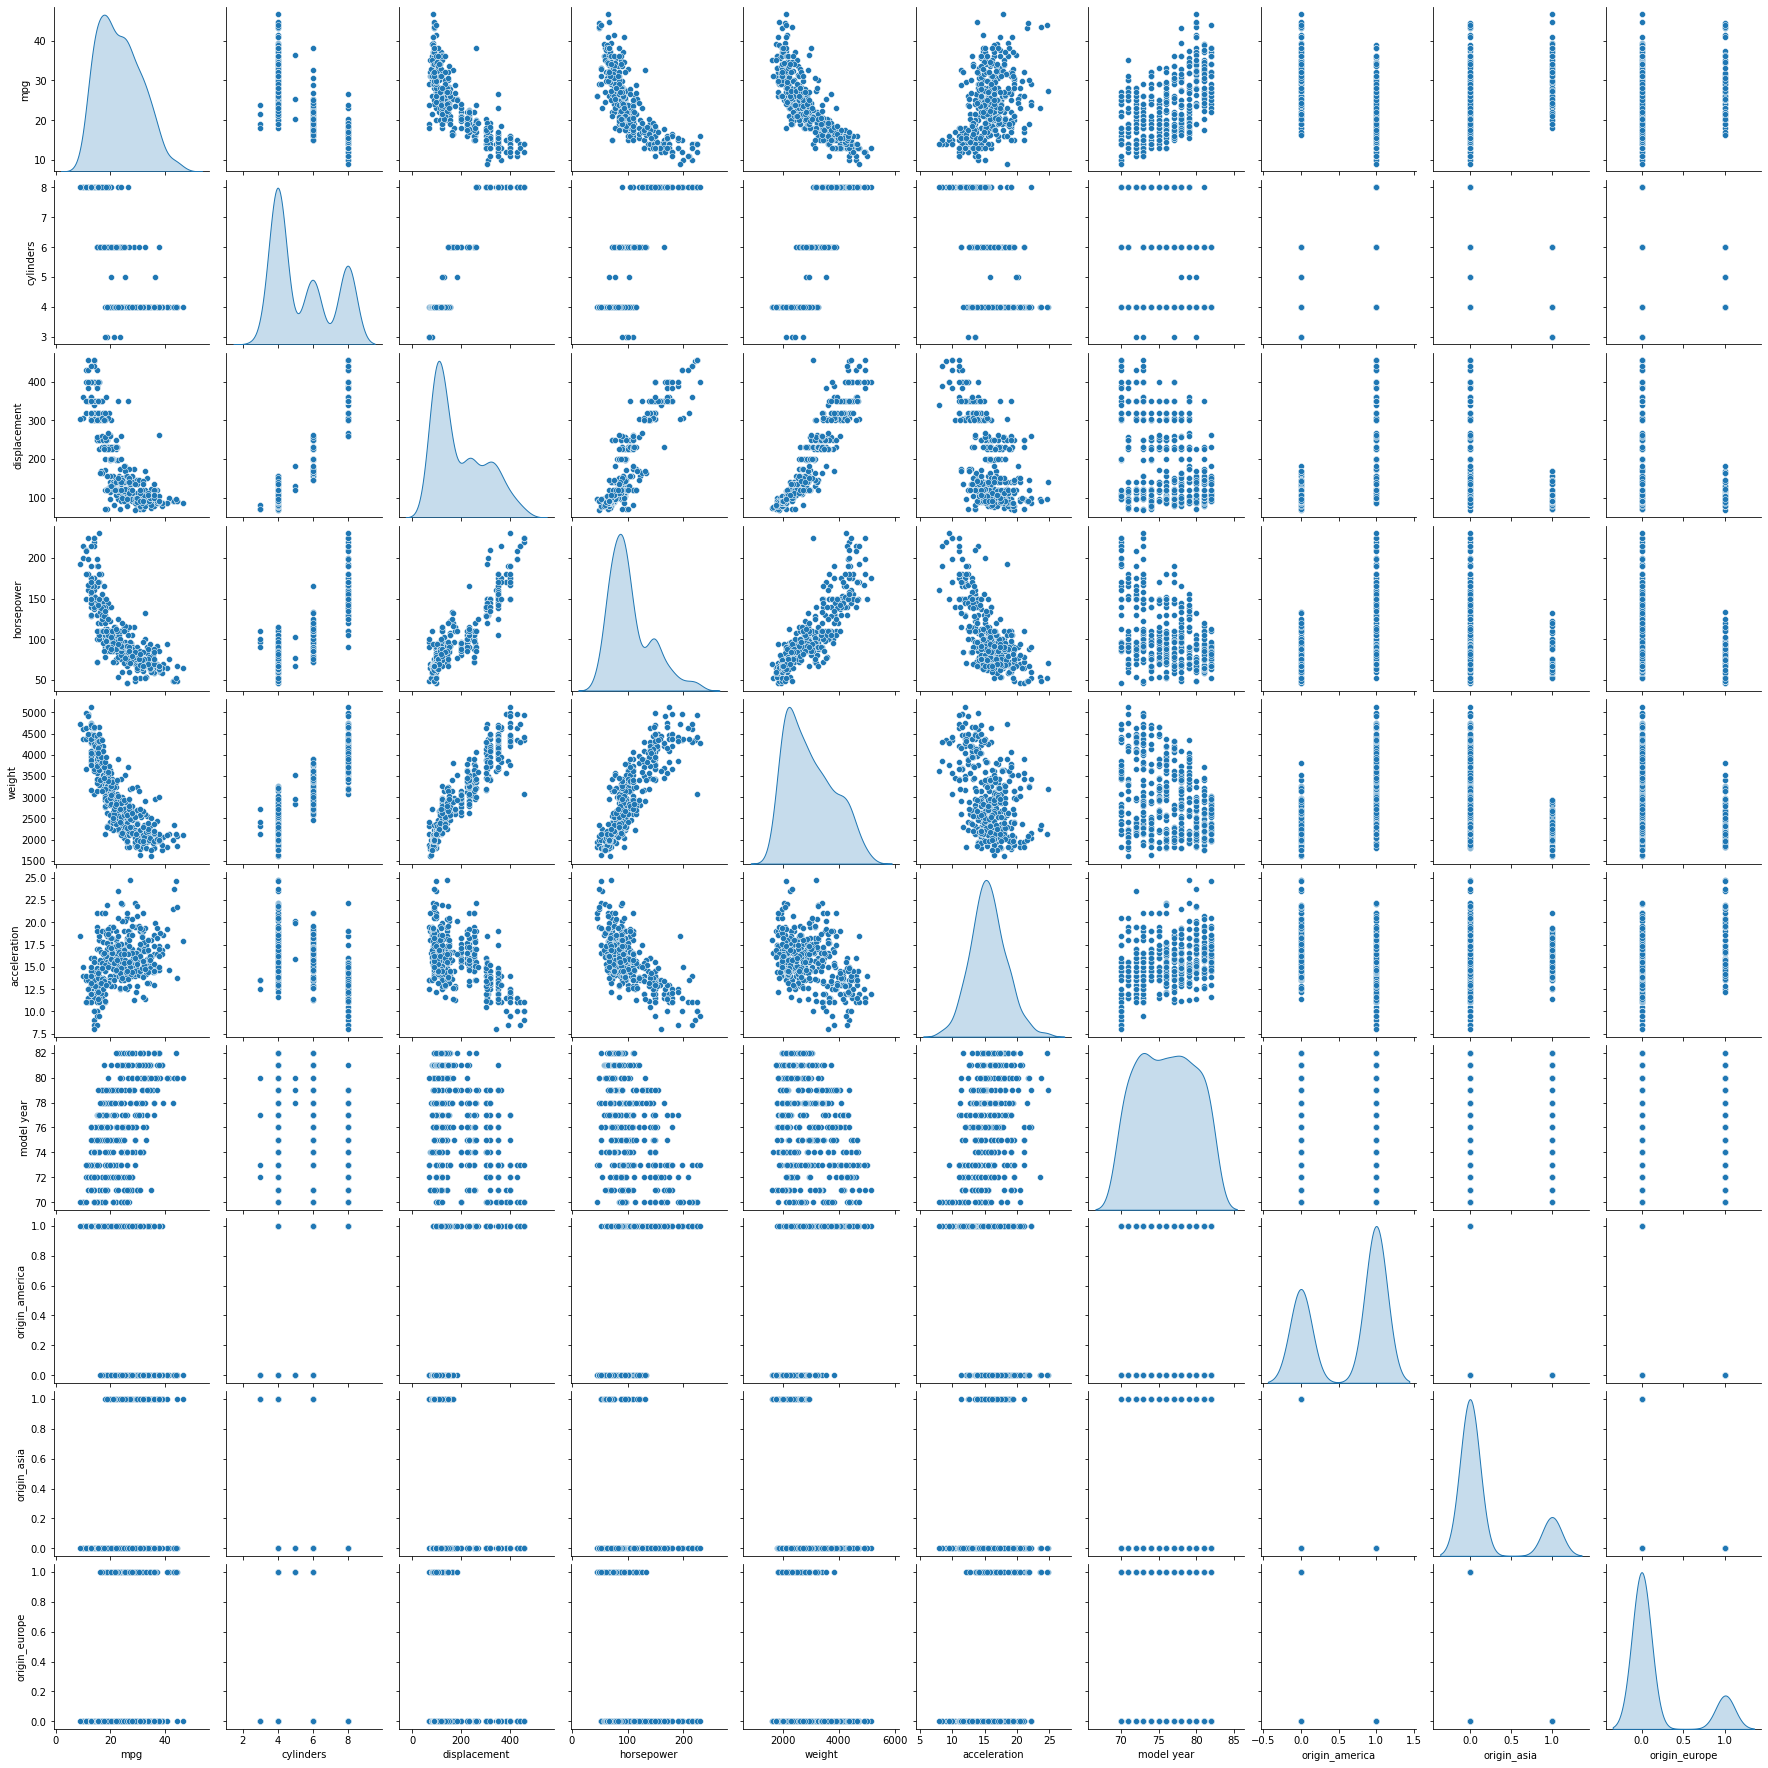

In [31]:
sns.pairplot(car_df,diag_kind="kde")

Observation between 'mpg' and other attributes indicate the relationship is not really linear. However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern. Several assumptions of classical linear regression seem to be violated, including the assumption of no Heteroscedasticity


In [32]:
car_df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin_america  origin_asia  origin_europe  
0          70               1            0              0  
1          70               1            0              0  
2          70               1            0              0  
3          70               1            0              0  
4          70               1            0              0

## Split Data

In [33]:
# lets build our linear model
# independant variables
X = car_df.drop(['mpg'], axis=1)
# the dependent variable
y = car_df[['mpg']]

In [34]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

## Fit Linear Model

In [35]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)


LinearRegression()

Here are the coefficients for each variable and the intercept

The score (R^2) for in-sample and out of sample

In [36]:
reg_model.score(X_train, y_train)

0.8141025501610559

In [37]:
#out of sample score (R^2)

reg_model.score(X_test, y_test)


0.8433135132808828

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

#y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.9015333048052525


In [39]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

0.8647737721382303


### Decision Tree Regression

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
model=DecisionTreeRegressor(criterion="friedman_mse",max_depth=3)

In [42]:
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3)

In [43]:
model.score(X_train,y_train)

0.8252713272277856

In [44]:
model.score(X_test,y_test)

0.7892652919447366

In [45]:
from sklearn.ensemble import BaggingRegressor

In [46]:
model1=BaggingRegressor(n_estimators=14,base_estimator=model)

In [47]:
model1.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                      max_depth=3),
                 n_estimators=14)

In [48]:
model1.score(X_train,y_train)

0.8846776458529794

In [49]:
model1.score(X_test,y_test)

0.8761275593448653